In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [2]:
class BMI(TypedDict):
    """BMI TypedDict to hold the user's height and weight."""
    height: float
    weight: float
    BMI: float
    category: str



def calculate_bmi(state: BMI) -> BMI:
    """Calculate the BMI based on height and weight."""
    height_m = state['height'] / 100  # Convert height from cm to m
    bmi = state['weight'] / (height_m ** 2)
    state['BMI'] = bmi
    return state

def label_bmi(state: BMI) -> dict:
    """Label the BMI category and return BMI value and label."""
    bmi = state['BMI']
    if bmi < 18.5:
        label = "Underweight"
    elif 18.5 <= bmi < 24.9:
        label = "Normal weight"
    elif 25 <= bmi < 29.9:
        label = "Overweight"
    else:
        label = "Obesity"
    return {"BMI": bmi, "category": label}

In [3]:
my_graph = StateGraph(BMI)

my_graph.add_node('bmi_calculation', calculate_bmi)
my_graph.add_node("bmi_label", label_bmi)

my_graph.add_edge(START, 'bmi_calculation')
my_graph.add_edge('bmi_calculation', 'bmi_label')
my_graph.add_edge('bmi_label', END)


workflow = my_graph.compile()

In [4]:
workflow.invoke({"height": 170, "weight": 70 })

{'height': 170,
 'weight': 70,
 'BMI': 24.221453287197235,
 'category': 'Normal weight'}

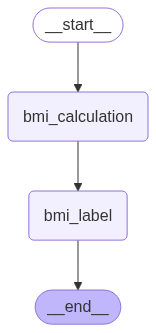

In [5]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())